In [1]:
# Import data and modules
import numpy as np
from sklearn import datasets # sklearn is a machine learning library
# we just import the iris dataset from sklearn

iris = datasets.load_iris()
# this data could have been loaded from a file as well, from pandas, etc.
# https://archive.ics.uci.edu/ml/datasets/iris

X = iris.data[:, [2, 3]] # in ML the input data is often labaled with capital X (capital because many dimensions)
y = iris.target # y is what we are trying to determing and also the label of what we know

In [2]:
np.__version__

'1.24.3'

In [3]:
X[:5] # these are measurements of the flowers

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [4]:
y[:5] # these are the labels of the flowers

array([0, 0, 0, 0, 0])

In [5]:
y[47:53]

array([0, 0, 0, 1, 1, 1])

In [6]:
y[98:103]

array([1, 1, 2, 2, 2])

In [7]:
set(y)

{0, 1, 2}

In [ ]:
# so 0, 1, 2 are the labels of the flowers
# species 0 is setosa
# species 1 is versicolor
# species 2 is virginica

In [8]:
ylist = list(y)
ylist[:5]

[0, 0, 0, 0, 0]

In [9]:
from collections import Counter
cnt = Counter(ylist)
cnt.most_common()

[(0, 50), (1, 50), (2, 50)]

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
# first we need to set aside a testing set for testing our model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [12]:
X_train[:10]

array([[3.5, 1. ],
       [5.5, 1.8],
       [5.7, 2.5],
       [5. , 1.5],
       [5.8, 1.8],
       [3.9, 1.1],
       [6.1, 2.3],
       [4.7, 1.6],
       [3.8, 1.1],
       [4.9, 1.8]])

In [13]:
X_train.min(),X_train.max(),X_train.mean()

(0.1, 6.9, 2.528095238095238)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [15]:
X_combined_std[:10]

array([[-0.18295039, -0.29318114],
       [ 0.93066067,  0.7372463 ],
       [ 1.04202177,  1.63887031],
       [ 0.6522579 ,  0.35083601],
       [ 1.09770233,  0.7372463 ],
       [ 0.03977182, -0.16437771],
       [ 1.26474398,  1.38126345],
       [ 0.48521625,  0.47963944],
       [-0.01590873, -0.16437771],
       [ 0.59657735,  0.7372463 ]])

C:\Users\val-wd\AppData\Local\Temp\ipykernel_4636\3783131042.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


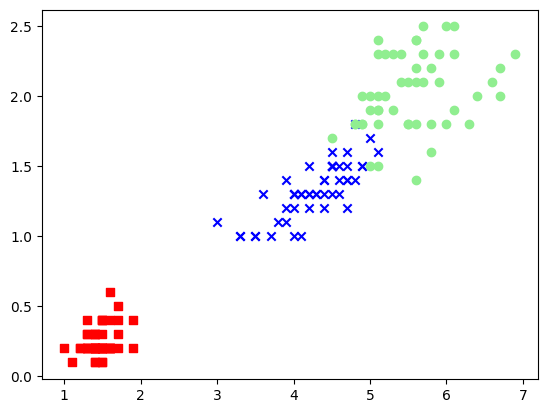

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

In [17]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label="test set")

In [19]:
from sklearn.linear_model import Perceptron # similarly we can use other models
ppn = Perceptron(eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train) # here the magic happens and model is trainer
y_pred = ppn.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())

Misclassfied samples: 5


In [20]:
from sklearn.metrics import accuracy_score
print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.89


In [21]:
y_test[:10]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [22]:
y_pred[:10]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [21]:
for test,pred in zip(y_test, y_pred):
    if test != pred:
        print(f"Prediction {pred} != {test}")

Prediction 1 != 2
Prediction 0 != 1
Prediction 0 != 1
Prediction 2 != 1
Prediction 0 != 1


In [25]:
5/45

0.1111111111111111

In [22]:
40/45

0.8888888888888888

C:\Users\val-wd\AppData\Local\Temp\ipykernel_4636\2176663551.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

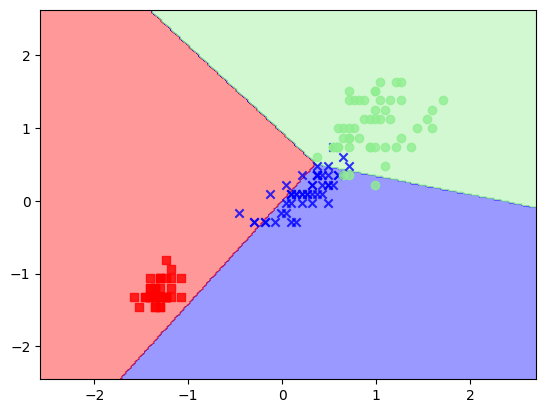

In [23]:
plot_decision_regions(X=X_combined_std, 
                      y=y_combined, 
                      classifier=ppn, 
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0) # hyper parameters for specific model
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-18-7d3cc7f56244>:27: Matplotlib

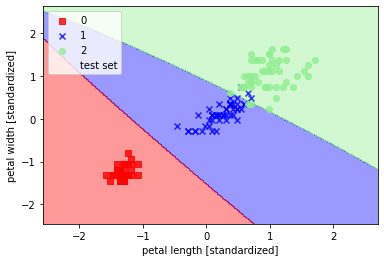

In [29]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# How to choose models?
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html